# <center>APLU Western Cluster Curricular Analytics Study</center>

In this notebook we analyze the curricula associated with a set of programs at universities in the APLU 
Western Cluster. The cluster of schools is one of the "transformation clusters" formed as a part of APLU's 
[Powered by Publics Initiative]
(https://www.aplu.org/projects-and-initiatives/center-for-public-university-transformation/powered-by-publics) 
<cite data-cite="APLU:18">(APLU, 2019)</cite>. The schools in the Western Cluster include:

- Colorado State University
- Langston University
- Montana State University
- New Mexico State University
- North Dakota State University
- Oklahoma State University
- South Dakota State University
- University of Idaho
- University of Nevada-Reno
- University of Wyoming
- Utah State University

The analyses in this notebook makes use of the [Curricular Analytics toolbox](https://github.com/CurricularAnalytics/CurricularAnalytics.jl) 
built using the Julia programming language  and available as open source software (<cite data-cite="he:19">Heileman, et. al., 2019</cite>). As a starting 
point, you may find it useful to read the [toolbox documenation](https://curricularanalytics.github.io/CurricularAnalytics.jl/latest/), as well as 
the <cite data-cite="he:18">Heileman, et. al., (2018)</cite> paper listed in the [References](#References) 
section below.

If you are interested in joining the community of scholars working to apply curricular analytics, please 
feel free to make [suggestions](need to add this link) about future development or [contribute](https://curricularanalytics.github.io/CurricularAnalytics.jl/latest/contributing.html) to the 
CurricularAnalytics.jl project.


In order to execute the analyses provided in this notebook, you need to load the following Julia packages.

In [2]:
########## use this to run CA locally
using Pkg
if split(pwd(),Base.Filesystem.path_separator)[end] != "CurricularAnalytics.jl"
    cd("../../CurricularAnalytics.jl/")
end
pkg"activate ."
cd("../CA-Notebooks/Western Cluster-APLU")
############
using CurricularAnalytics
using Glob
using CSV
using DataFrames
using Statistics

┌ Info: Recompiling stale cache file /Users/heileman/.julia/compiled/v1.1/CurricularAnalytics/pJfqI.ji for CurricularAnalytics [593ffa3d-269e-5d81-88bc-c3b6809c35a6]
└ @ Base loading.jl:1184
ERROR: LoadError: LoadError: ArgumentError: invalid type for argument xlim in method definition for #metric_histogram#57 at /Users/heileman/Library/Mobile Documents/com~apple~CloudDocs/work/research/Curricular Analytics/CurricularAnalytics.jl/src/Visualization.jl:223
Stacktrace:
 [1] top-level scope at none:0
 [2] include at ./boot.jl:326 [inlined]
 [3] include_relative(::Module, ::String) at ./loading.jl:1038
 [4] include at ./sysimg.jl:29 [inlined]
 [5] include(::String) at /Users/heileman/Library/Mobile Documents/com~apple~CloudDocs/work/research/Curricular Analytics/CurricularAnalytics.jl/src/CurricularAnalytics.jl:9
 [6] top-level scope at none:0
 [7] include at ./boot.jl:326 [inlined]
 [8] include_relative(::Module, ::String) at ./loading.jl:1038
 [9] include(::Module, ::String) at ./sysimg.j

ErrorException: Failed to precompile CurricularAnalytics [593ffa3d-269e-5d81-88bc-c3b6809c35a6] to /Users/heileman/.julia/compiled/v1.1/CurricularAnalytics/pJfqI.ji.

## Create the Data Structures 
First, create an array called `schools` containing the names of the schools in the cluster, given by the subdirectory names in the ./cluster directory.

In [3]:
# read all of the schools stored in the ./cluster directory
schools = Array{String,1}()
for path in glob("*", "./cluster")
  push!(schools, replace(path, "./cluster/" => ""))
end

UndefVarError: UndefVarError: glob not defined

The degree plans for the selected programs at these schools are stored as CSV files in the `./cluster` directory associated with this notebook.  Next, we will read each of these degree plans, and store them as `DegreePlan` objects in a `school_plans` dictionary.

In [4]:
schools_plans = Dict{String, Dict{String, DegreePlan}}()
for school in schools
  plans = Dict{String, DegreePlan}()
  programs = glob("*", "./cluster/$(school)")
  for program in programs
    program_name = replace(split("$(program)", "/")[end], ".csv" => "")
    plans[program_name] = read_csv(program)
    complexity(plans[program_name].curriculum)  # compute the curricular complexity of the degree plan
  end
  schools_plans[school] = plans
end

UndefVarError: UndefVarError: DegreePlan not defined

You can now access and visualize the degree plan associate witha a particular program at a particular school as follows:

In [5]:
dp = schools_plans["colorado-state"]["music-education"]
visualize(dp, notebook=true)

UndefVarError: UndefVarError: schools_plans not defined

## Curricular Analytics

### Analysis of a single curriclum 
The `basic_metrics()` function can be used to output a set of basic metrics associatd with a curriculum. As an example, here are the basic curricular metrics associated with the Music Education program at Colorado State Univeristy:

In [5]:
dp = schools_plans["colorado-state"]["music-education"]
metrics = basic_metrics(dp.curriculum)
println(String(take!(metrics)))


Colorado State University 
Curriculum: Music Education
  credit hours = 120
  number of courses = 62
  Blocking Factor --
    entire curriculum = 96
    max. value = 14, for course(s): MU 117
  Centrality --
    entire curriculum = 647
    max. value = 138, for course(s): EDUC 450
  Delay Factor --
    entire curriculum = 199.0
    max. value = 8.0, for course(s): MU 117, MU 118, EDUC 275, MU 217, EDUC 340, EDUC 350, EDUC 386, EDUC 475, EDUC 450, EDUC 477, EDUC 485A, EDUC 485B, EDUC 493A
  Complexity --
    entire curriculum = 295.0
    max. value = 22.0, for course(s): MU 117
  Longest Path(s) --
    length = 8, number of paths = 2
    path(s):
    path 1 = EDUC 340 -> EDUC 475 -> EDUC 386 -> EDUC 350 -> EDUC 450 -> EDUC 493A -> EDUC 485B -> EDUC 485A
    path 2 = MU 117 -> MU 118 -> MU 217 -> EDUC 477 -> EDUC 450 -> EDUC 493A -> EDUC 485B -> EDUC 485A



Here are the basic curricular metrics associated with the Mechanical Engineering program at Colorado State Univeristy:

In [6]:
dp = schools_plans["colorado-state"]["mechanical-engineering"]
metrics = basic_metrics(dp.curriculum)
println(String(take!(metrics)))


Colorado State University 
Curriculum: Mechanical Engineering
  credit hours = 129
  number of courses = 39
  Blocking Factor --
    entire curriculum = 143
    max. value = 26, for course(s): MATH 160
  Centrality --
    entire curriculum = 680
    max. value = 81, for course(s): PH 141
  Delay Factor --
    entire curriculum = 176.0
    max. value = 7.0, for course(s): MATH 160, MATH 161, MATH 261, MATH 340, MECH 342, MECH 338, MECH 486B, MECH 498B
  Complexity --
    entire curriculum = 319.0
    max. value = 33.0, for course(s): MATH 160
  Longest Path(s) --
    length = 7, number of paths = 4
    path(s):
    path 1 = MATH 160 -> MATH 161 -> MATH 261 -> MATH 340 -> MECH 342 -> MECH 338 -> MECH 486B
    path 2 = MATH 160 -> MATH 161 -> MATH 261 -> MECH 337 -> MECH 342 -> MECH 338 -> MECH 486B
    path 3 = MATH 160 -> MATH 161 -> MATH 261 -> MATH 340 -> MECH 342 -> MECH 338 -> MECH 498B
    path 4 = MATH 160 -> MATH 161 -> MATH 261 -> MECH 337 -> MECH 342 -> MECH 338 -> MECH 498B



### Analysis of programs across all cluster schools.

In [7]:
programs = ["animal-science", "mechanical-engineering", "music-education", "psychology"]
for program in programs 
    cc = Array{Real,1}()  # new array for storing curricular complexity values
    for school in schools
      path = "./cluster/$(school)"
      if "$(program).csv" in readdir(path)
        push!(cc, schools_plans[school][program].curriculum.metrics["complexity"][1])
      end
    end
    println("Western Cluster $(program) programs complexity metrics:") 
    println(" Number of programs = $(length(cc))")
    println(" Mean = $(mean(cc))\n STD = $(std(cc))\n Min. = $(minimum(cc))\n Max. = $(maximum(cc))\n\n")
end

Western Cluster animal-science programs complexity metrics:
 Number of programs = 4
 Mean = 178.25
 STD = 88.24728513293388
 Min. = 103.0
 Max. = 306.0


Western Cluster mechanical-engineering programs complexity metrics:
 Number of programs = 10
 Mean = 309.1
 STD = 97.46161637622612
 Min. = 140.0
 Max. = 496.0


Western Cluster music-education programs complexity metrics:
 Number of programs = 9
 Mean = 213.66666666666666
 STD = 52.853571307906904
 Min. = 145.0
 Max. = 295.0


Western Cluster psychology programs complexity metrics:
 Number of programs = 9
 Mean = 76.55555555555556
 STD = 23.324403052978177
 Min. = 40.0
 Max. = 113.0




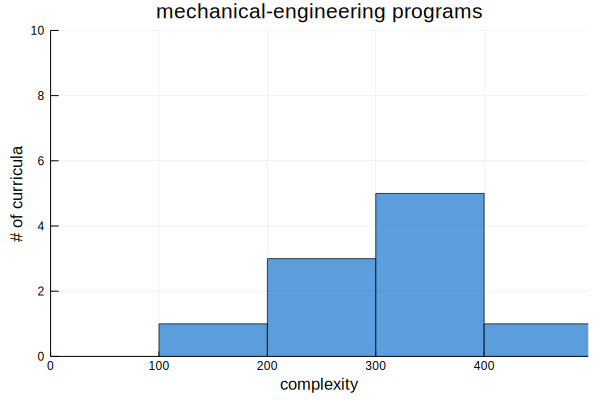

In [8]:
program = "mechanical-engineering"
metric = "complexity"
curricula = Array{Curriculum,1}()  # new array for storing curricular complexity values
for school in schools
    path = "./cluster/$(school)"
    if "$(program).csv" in readdir(path)
        push!(curricula, schools_plans[school][program].curriculum)
    end
end
metric_histogram(curricula, metric, 5, title = "$(program) programs", xlabel="$(metric)", ylabel="# of curricula")

## Degree Plan Analytics

### Analysis of a single degree plan 
Music Education at CSU:

In [16]:
metrics = basic_metrics(dp)
println(String(take!(metrics)))


Curriculum: Mechanical Engineering
Degree Plan: 4-Year Plan
  total credit hours = 129
  number of terms = 8
  max. credits in a term = 20, in term 4
  min. credits in a term = 13, in term 6
  avg. credits per term = 16.125, with std. dev. = 2.0879116360612584



## References
<a id='References'></a>

APLU, Powered by Publics website (accessed August 15, 2019). https://www.aplu.org/projects-and-initiatives/center-for-public-university-transformation/powered-by-publics

Heileman, G. L., Abdallah, C.T., Slim, A., and Hickman, M. (2018). Curricular analytics: A framework for quantifying the impact of curricular reforms and pedagogical innovations. www.arXiv.org, arXiv:1811.09676 [cs.CY].

Heileman, G. L., Free, H. W., Abar, O. and Thompson-Arjona, W. G, (2019). CurricularAnalytics.jl Toolbox. https://github.com/heileman/CurricularAnalytics.jl.